# **AYUDANTÍA 6 - Introducción a la Ciencia de Datos - IMT2200**
- Rocío Ladrón de Guevara (rociohgj@uc.cl)
- Daniela Victorero (dvictorerol@uc.cl)


In [78]:
import numpy as np
import pandas as pd

# INTRODUCCIÓN AL ANÁLISIS EXPLORATORIO DE DATOS

- La comprensión del problema cambia a
medida que avanzamos.


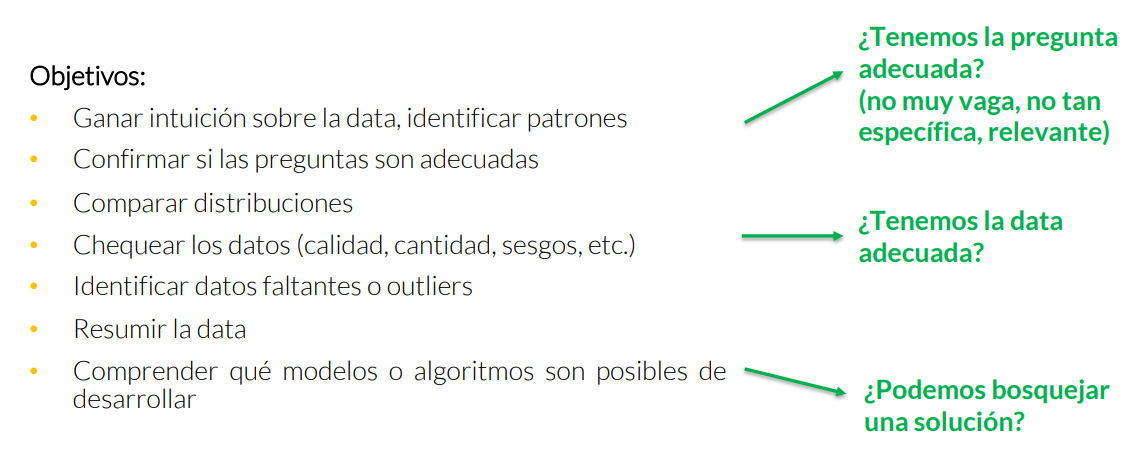


    

Análisis Exploratorio de Datos - Pasos básicos

Chequear metadata y estructura general de los datos:

- ¿ Qué información tenemos de la data/variables antes de leerlos archivos?
- ¿Qué columnas / tipos de datos vemos al leerlos datos en un DataFrame (df)?

Chequear primeras y últimas filas:

- ¿Hay filas vacías/corruptas?
- ¿Conviene ordenarlos datos de alguna forma especial? Ej: fechas

Conteos generales:

- Nº de filas, Nº columnas, Nº valores nulos, Nº categorías, Nº valores únicos.
- Estadísticas descriptivas: rangos de valores, totales, medias, dispersiones, correlaciones, etc.

Validar con fuentes externas.
- ¿Hay valores extraños, faltan datos?


Próxima Ayudantía 👀

Hacer gráficos:
- Permiten resumirlos datos
- Permite verificar expectativas, y desviaciones de las expectativas

Plantear una solución “fácil” al problema, y testearla (con gráficos, tablas, etc)

Iterar, hasta tener convencimiento respecto a si:
- ¿Tenemos la pregunta
adecuada?
- ¿Tenemos la data
adecuada?
- ¿Podemos bosquejar
una solución?

**Fuente: Slides Clase 14 IMT2200 2022-2**

# EJEMPLO: Productos en Amazon 2023 🛒

**Fuente : [Amazon Products Dataset 2023 (1.4M Products) - Kaggle](https://www.kaggle.com/datasets/asaniczka/amazon-products-dataset-2023-1-4m-products)**

Objetivo: Analizar la cantidad de ventas de un producto mediante distintas variables. Las preguntas que podríamos responder a partir de los datos son:

- ¿La cantidad de reviews es un determinador para la cantidad de ventas?
- ¿Cuál es la media de precios de lista de cada categoría?
- ¿Que tanto varían los precios de lista de cada categoría?
- ¿El precio de lista determina si un producto se venderá menos?


In [79]:
df_products = pd.read_csv('amazon_products.csv', encoding = 'utf-8')
df_products

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400
...,...,...,...,...,...,...,...,...,...,...,...
1426332,B00R3LIKCO,American Flag Patriotic USA Classic 5 Panel Me...,https://m.media-amazon.com/images/I/71PDJFz6AA...,https://www.amazon.com/dp/B00R3LIKCO,4.2,0,14.95,0.00,112,False,0
1426333,B098BQ7ZQ3,Men's Baseball Cap - H2O-DRI Line Up Curved Br...,https://m.media-amazon.com/images/I/812Tycexs4...,https://www.amazon.com/dp/B098BQ7ZQ3,4.4,0,33.99,0.00,112,False,0
1426334,B07X1MVNT1,[4 Pack] Adjustable Eyeglasses and Sunglasses ...,https://m.media-amazon.com/images/I/61vvYW1S9J...,https://www.amazon.com/dp/B07X1MVNT1,3.6,0,8.54,0.00,112,False,0
1426335,B08XLBG8V9,Ax2002 Aviator Sunglasses,https://m.media-amazon.com/images/I/51+yjD4F1x...,https://www.amazon.com/dp/B08XLBG8V9,4.5,0,54.36,57.39,112,False,0


Revisión básica del Dataset:

In [80]:
df_products.columns

Index(['asin', 'title', 'imgUrl', 'productURL', 'stars', 'reviews', 'price',
       'listPrice', 'category_id', 'isBestSeller', 'boughtInLastMonth'],
      dtype='object')

In [81]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 110.2+ MB


In [82]:
df_products.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


In [83]:
df_products.tail()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
1426332,B00R3LIKCO,American Flag Patriotic USA Classic 5 Panel Me...,https://m.media-amazon.com/images/I/71PDJFz6AA...,https://www.amazon.com/dp/B00R3LIKCO,4.2,0,14.95,0.00,112,False,0
1426333,B098BQ7ZQ3,Men's Baseball Cap - H2O-DRI Line Up Curved Br...,https://m.media-amazon.com/images/I/812Tycexs4...,https://www.amazon.com/dp/B098BQ7ZQ3,4.4,0,33.99,0.00,112,False,0
1426334,B07X1MVNT1,[4 Pack] Adjustable Eyeglasses and Sunglasses ...,https://m.media-amazon.com/images/I/61vvYW1S9J...,https://www.amazon.com/dp/B07X1MVNT1,3.6,0,8.54,0.00,112,False,0
1426335,B08XLBG8V9,Ax2002 Aviator Sunglasses,https://m.media-amazon.com/images/I/51+yjD4F1x...,https://www.amazon.com/dp/B08XLBG8V9,4.5,0,54.36,57.39,112,False,0
1426336,B07GH67QC8,in Hoc Signo Vinces Knights Templar Masonic Em...,https://m.media-amazon.com/images/I/91Kt2KQf0E...,https://www.amazon.com/dp/B07GH67QC8,4.9,0,18.79,0.00,112,False,0


In [84]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 110.2+ MB


Observamos que la mayoría de los datos de las columnas no son nulos.

In [85]:
df_products.describe()

,stars,reviews,price,listPrice,category_id,boughtInLastMonth
count,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06
mean,3.999512e+00,1.807508e+02,4.337540e+01,1.244916e+01,1.237409e+02,1.419823e+02
std,1.344292e+00,1.761453e+03,1.302893e+02,4.611198e+01,7.311273e+01,8.362720e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.100000e+00,0.000000e+00,1.199000e+01,0.000000e+00,6.500000e+01,0.000000e+00
50%,4.400000e+00,0.000000e+00,1.995000e+01,0.000000e+00,1.200000e+02,0.000000e+00
75%,4.600000e+00,0.000000e+00,3.599000e+01,0.000000e+00,1.760000e+02,5.000000e+01
max,5.000000e+00,3.465630e+05,1.973181e+04,9.999900e+02,2.700000e+02,1.000000e+05


¿Importan las estadísticas de resumen para la columna de categorías de un producto? - No, ya que corresponden a datos categóricos, y no tienen válidez numérica.

In [86]:
pd.unique(df_products['category_id'])

array([104, 110, 245, 114, 112, 175,  69, 157,  71, 251, 252, 253,  89,
        91,  84,  31,  53,   2, 140, 190,  72, 228, 239, 240, 255, 186,
       206, 270, 124,  16, 128,  17, 230, 237,  56,  95, 108,   4, 118,
        51,  30,  81, 165, 141,  24,  49,  68, 183, 195, 182, 216,  58,
        35, 222,   1,  66, 166, 260,  13,  76, 146, 134,  46, 167, 236,
       178, 151, 210, 221,  27, 238, 135,  40,  98,  99, 149, 248, 163,
        80, 164, 129,  57, 187, 189, 191,  73, 209, 263, 174, 264,  78,
       126,   8, 223,  96,  97,  47, 160, 225,  12, 259, 131, 232, 234,
        43, 201, 231, 154,  77, 127,   9, 155,  79, 173, 205,  55, 144,
        74,  44, 168, 171, 150, 196, 197, 198, 212, 220, 254, 113, 218,
       153,  65, 162, 130,  88, 148, 184, 217, 243, 262, 188, 159, 120,
        15,  63,  38,  10,  22, 214, 133, 116,   3, 138,  25, 136,  45,
        48,  42, 224,  70,  28,  83, 265, 256, 261, 192, 193, 199, 241,
       200, 208, 125, 123,  20,  34,  33, 100,  87, 102,  41, 13

In [87]:
len(pd.unique(df_products['category_id']))

248

In [88]:
df_products['category_id'].max()

270

Hay 248 categorías consideradas en el dataset, sin embargo, la mayor corresponde a 270, lo que nos puede dar el indicio de que no hay productos de ciertas categorías en el dataset, o bien, hay saltos entre los valores de las categorías.

In [89]:
df_products[df_products['stars'].isnull()]

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth


# FUNDAMENTOS MATEMÁTICOS

#### Estadísticas de resumen


- **Media** (`np.mean()`): es la suma de todos los valores, dividida por el número de puntos.

$$\mu=\frac{1}{n} \sum_{i=1}^n x_i $$

- **Mediana** (`np.median()`): es el valor medio de un conjunto de datos. Es inmune a valores extremos o outliers. Para calcularla, se ordenan los datos y se elige el valor que queda en la mitad.

- **Percentiles** (`np.percentile()`): el percentil $p$, corresponde al valor que es mayor al $p\%$ de los datos.


- **Varianza** (`np.var()`): promedio de la distancia cuadrática de los datos a la media. Es una medida de la dispersión de los datos.

$$\rm{Var}=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2$$

- **Desviación estándar** (`np.std()`): es la raíz cuadrada de la varianza. Está en la misma escala de unidades que los datos.

$$\sigma=\sqrt{\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2}$$

- **Covarianza** (`np.cov()`): es una medida de cómo dos cantidades varían juntas.
Es la media del producto entre las diferencias de los valores respecto a la media.

$$\rm{Cov} (x,y)=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})$$

- **Coeficiente de correlación de Pearson** (`np.corrcoef`): para tener una medida más general y aplicable de la correlación entre dos variables, necesitamos que sea adimensional. Por lo tanto dividimos la covarianza por las desviaciones estándar de $x$ e $y$. Esto define el coeficiente de correlación de Pearson ($\rho$).

$$\rho=\frac{\rm{Cov} (x,y)}{\sigma_x \sigma_y}$$


**Fuente: Jupyter Notebook Clase 16 IMT2200 2022-2**

Estadísticas de resumen - Análisis Univariable

In [90]:
df_products['listPrice'].mean()

12.449159714709777

In [91]:
df_products['listPrice'].median()

0.0

In [92]:
p = 90

np.percentile(df_products['listPrice'], p)

31.5

In [93]:
np.var(df_products['listPrice'])

2126.313594692834

In [94]:
np.std(df_products['listPrice'])

46.111968020166245

Estadísticas de resumen - Análisis Multivariable

In [95]:
np.cov(df_products['listPrice'], df_products['boughtInLastMonth'])

array([[2.12631509e+03, 1.45588448e+02],
       [1.45588448e+02, 6.99350800e+05]])

In [96]:
np.corrcoef(df_products['listPrice'], df_products['boughtInLastMonth'])

array([[1.        , 0.00377542],
       [0.00377542, 1.        ]])

Respondamos las preguntas:

- ¿La cantidad de reviews es un determinador para la cantidad de ventas?


In [97]:
np.corrcoef(df_products['reviews'], df_products['boughtInLastMonth'])

array([[1.        , 0.14790597],
       [0.14790597, 1.        ]])

La correlación entre la cantidad de reviews y la cantidad de ventas es muy baja, por lo que no hay una relación significante.

- ¿Cuál es la media de precios de lista de cada categoría?


In [98]:
categories = df_products['category_id'].unique()
df_cat_mean = pd.DataFrame(columns=['priceMean'], index = categories)
df_cat_mean['priceMean'] = df_cat_mean['priceMean'].astype(np.float64)
for cat in categories:
    cat_mean = df_products[df_products['category_id'] == cat]['listPrice'].mean()
    df_cat_mean.loc[cat, 'priceMean'] = cat_mean
df_cat_mean

,priceMean
104,34.300909
110,16.969224
245,10.007256
114,41.970841
112,15.180191
...,...
204,7.662148
106,4.724589
105,4.206369
137,3.054276


In [99]:
print('id ' + str(df_cat_mean['priceMean'].idxmin()))
print('mean ' + str(df_cat_mean['priceMean'].min()))

id 125
mean 0.0


In [100]:
print('id ' + str(df_cat_mean['priceMean'].idxmax()))
print('mean ' + str(df_cat_mean['priceMean'].max()))

id 197
mean 141.63458781362007


- ¿Que tanto varían los precios de lista de cada categoría?

In [101]:
categories = df_products['category_id'].unique()
df_cat_mean = pd.DataFrame(columns=['priceSTD'], index = categories)
df_cat_mean['priceSTD'] = df_cat_mean['priceSTD'].astype(np.float64)
for cat in categories:
    cat_std = df_products[df_products['category_id'] == cat]['listPrice'].std()
    df_cat_mean.loc[cat, 'priceSTD'] = cat_std
df_cat_mean

,priceSTD
104,88.480114
110,36.896044
245,23.127059
114,64.508943
112,49.228283
...,...
204,28.462972
106,13.086150
105,12.660722
137,7.300478


In [102]:
print('id ' + str(df_cat_mean['priceSTD'].idxmin()))
print('std ' + str(df_cat_mean['priceSTD'].min()))

id 125
std 0.0


In [103]:
print('id ' + str(df_cat_mean['priceSTD'].idxmax()))
print('std ' + str(df_cat_mean['priceSTD'].max()))

id 188
std 252.98166506202617


- ¿El precio de lista determina si un producto se venderá menos?


In [104]:
np.corrcoef(df_products['listPrice'], df_products['boughtInLastMonth'])

array([[1.        , 0.00377542],
       [0.00377542, 1.        ]])

# EJERCICIO



Plantea nuevas preguntas que se puedan responder con los atributos y datos en relación al objetivo, e intenta responderlas mediante estadísticas de resumen.